# **Sentiment Analysis**

**Project Title**

Review Analysis of Ultrahuman M1 SMG Using NLP

**Project Purpose**

1.To harness Natural Language Processing to analyse customer reviews of Ultrahuman M1 Smart Glucose Monitoring.

2.To provide insights into customer sentiments, preferences and common complaints, enabling targeted improvements in product development, marketing strategies and customer service.

3.To better understand customer feedback in a structed and scalable way, enhancing decision making processes and improving customer satisfaction.

**Project Objectives**

1.Develop an NLP Model

2.Generate Actionable Insights

3.Create a Dashboard

# **Web Scrapping**

In [ ]:
import requests
from bs4 import BeautifulSoup
import time

# Base URL of the product reviews page (ensure it points to the reviews section)
base_url = "https://www.amazon.in/Ultrahuman-M1-Glucose-Monitoring-FreeStyle/product-reviews/B0BFFYCJQJ"

# Function to get review data from a single page
def get_reviews_from_page(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")

    review_containers = soup.find_all("div", class_="a-section review aok-relative")
    reviews = []
    for review in review_containers:
        review_text = review.find("span", class_="a-size-base review-text review-text-content").text.strip()
        review_rating = review.find("span", class_="a-icon-alt").text.strip()
        reviews.append({"text": review_text, "rating": review_rating})
    return reviews

# Scrape reviews across multiple pages
all_reviews = []
current_page = 1

while True:
    page_url = f"{base_url}/ref=cm_cr_arp_d_paging_btm_next_{current_page}?pageNumber={current_page}"
    print(f"Scraping page {current_page}: {page_url}")
    reviews = get_reviews_from_page(page_url)

    if not reviews:
        break  # Exit if no more reviews are found

    all_reviews.extend(reviews)
    current_page += 1
    time.sleep(2)  # Pause

# Print the collected reviews
for review in all_reviews:
    print("Review Text:", review["text"])
    print("Rating:", review["rating"])
    print("\n---\n")

print(f"Total reviews scraped: {len(all_reviews)}")


Scraping page 1: https://www.amazon.in/Ultrahuman-M1-Glucose-Monitoring-FreeStyle/product-reviews/B0BFFYCJQJ/ref=cm_cr_arp_d_paging_btm_next_1?pageNumber=1
Total reviews scraped: 0


In [ ]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import requests
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Base URL of the product reviews page
base_url = "https://www.amazon.in/Ultrahuman-M1-Glucose-Monitoring-FreeStyle/product-reviews/B0BFFYCJQJ"

# Function to get review data from a single page
def get_reviews_from_page(url):
    if not url.startswith("https://"):
        url = "https://" + url  # Add the protocol if it's missing

    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")

    review_containers = soup.find_all("div", class_="a-section review aok-relative")
    reviews = []
    for review in review_containers:
        review_text = review.find("span", class_="a-size-base review-text review-text-content").text.strip()
        review_rating = review.find("span", class_="a-icon-alt").text.strip()

        # Perform sentiment analysis
        analyzer = SentimentIntensityAnalyzer()
        sentiment = analyzer.polarity_scores(review_text)

        reviews.append({"text": review_text, "rating": review_rating, "sentiment": sentiment})

    return reviews

# Scrape reviews from the first page
reviews = get_reviews_from_page(base_url)

# Print the results
for review in reviews:
    print("Review Text:", review["text"])
    print("Rating:", review["rating"])
    print("Sentiment:", review["sentiment"])
    print("\n---\n")

print(f"Total reviews scraped: {len(reviews)}")

Total reviews scraped: 0


In [ ]:
import requests

url='https://www.amazon.in/Ultrahuman-M1-Glucose-Monitoring-FreeStyle/product-reviews/B0BFFYCJQJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

response = requests.get(url)
html_content = response.content

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_content, "html.parser")

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]> <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8 a-lt-ie7"> <![endif]-->
<!--[if IE 7]>    <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8"> <![endif]-->
<!--[if IE 8]>    <html lang="en-us" class="a-no-js a-lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="a-no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <title dir="ltr">
   Amazon.in
  </title>
  <meta content="width=device-width" name="viewport"/>
  <link href="https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUI-3c913031596ca78a3768f4e934b1cc02ce238101.secure.min._V1_.css" rel="stylesheet"/>
  <script>
   if (true === true) {
    var ue_t0 = (+ new Date()),
        ue_csm = window,
        ue = { t0: ue_t0, d: function() { return (+new Date() - ue_t0); } },
        ue_furl = "fls-eu.amazon.in",
        

In [ ]:
# Find all elements with the class "review"
review_elements = soup.find_all("div", class_="review")

# Find the first element with the id "product_title"
product_title = soup.find("h1", id="product_title")

In [ ]:
# Find all elements with the class "review" and the id "positive"
positive_reviews = soup.select("div.review#positive")

In [ ]:
# Find the first review element
first_review = soup.find("div", class_="a-section review aok-relative")

# Print the HTML structure of the first review element
print(first_review.prettify())

AttributeError: 'NoneType' object has no attribute 'prettify'

**Review Text, Rating and Sentiment**

In [ ]:
# Extract the review text
review_text = first_review.find("span", class_="a-size-base review-text review-text-content").text.strip()

# Extract the review rating
review_rating = first_review.find("span", class_="a-icon-alt").text.strip()

# Extract the sentiment using NLTK
analyzer = SentimentIntensityAnalyzer()
sentiment = analyzer.polarity_scores(review_text)

# Print the extracted data
print("Review Text:", review_text)
print("Rating:", review_rating)
print("Sentiment:", sentiment)

In [ ]:
# Find all elements with the class "review"
review_elements = soup.find_all("div", class_="review")

# Find the first element with the id "product_title"
product_title = soup.find("h1", id="product_title")

# Find all review elements with the class "a-section review aok-relative"
review_containers = soup.find_all("div", class_="a-section review aok-relative")

reviews = []

for review_element in review_containers:
    # Extract the review text
    review_text = review_element.find("span", class_="a-size-base review-text review-text-content").text.strip()

    # Extract the review rating
    review_rating = review_element.find("span", class_="a-icon-alt").text.strip()

    # Extract the sentiment using NLTK
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(review_text)

    # Store the extracted data in a dictionary
    reviews.append({"text": review_text, "rating": review_rating, "sentiment": sentiment})

# Print the total number of reviews
print(f"Total reviews scraped: {len(reviews)}")

In [ ]:
import re

**Cleaning Text and Iterating through Reviews**

In [ ]:
def clean_text(review):
    # Check if the input is a dictionary
    if isinstance(review, dict):
        # Extract the text from the dictionary
        text = review['text']
    else:
        # Assume the input is already a string
        text = review

    # Remove non-alphabetic characters
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert text to lowercase
    cleaned_text = cleaned_text.lower()
    return cleaned_text

In [ ]:
words = []
for review in reviews:
    # Clean the text
    cleaned_text = clean_text(review)
    # Split the text into words
    words.extend(cleaned_text.split())

**Checking the missing text**

In [ ]:
def clean_text(review):
    # Check if the input is a dictionary
    if isinstance(review, dict):
        # Check if the 'text' field exists
        if 'text' in review:
            text = review['text']
        else:
            # Handle missing 'text' field (e.g., log a warning)
            return None
    else:
        # Assume the input is already a string
        text = review

    # Remove non-alphabetic characters
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert text to lowercase
    cleaned_text = cleaned_text.lower()
    return cleaned_text

**Handling non-string values**

In [ ]:
def clean_text(review):
    # Check if the input is a dictionary
    if isinstance(review, dict):
        # Check if the 'text' field exists and is a string
        if 'text' in review and isinstance(review['text'], str):
            text = review['text']
        else:
            # Handle non-string values in the 'text' field (e.g., log a warning)
            return None
    else:
        # Assume the input is already a string
        text = review

    # Remove non-alphabetic characters
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert text to lowercase
    cleaned_text = cleaned_text.lower()
    return cleaned_text

**Data Frame**

In [ ]:
cleaned_reviews = []

for review in reviews:
    # Clean the text
    cleaned_text = clean_text(review)

    # Add the cleaned text to the list
    cleaned_reviews.append(cleaned_text)

In [ ]:
for review in cleaned_reviews:
    print(review)

In [ ]:
import pandas as pd

# Create a DataFrame from the cleaned reviews
df = pd.DataFrame({'review': cleaned_reviews})

# Print the DataFrame
print(df)

# **Method 02**

In [ ]:
# Import packages
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime

In [ ]:
# Header to set the requests as a browser request
headers = {
    'authority': 'www.amazon.in',  # Correct domain for amazon.in
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9,bn;q=0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'
}

In [ ]:
# URL of the Amazon product's review page
reviews_url = 'https://www.amazon.in/Ultrahuman-M1-Glucose-Monitoring-FreeStyle/product-reviews/B0BFFYCJQJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'  # Update with actual product ID


In [ ]:
# Define number of pages to scrape
len_page = 10


In [ ]:
# Function to fetch reviews HTML from multiple pages
def reviewsHtml(url, len_page):
    soups = []
    for page_no in range(1, len_page + 1):
        params = {
            'ie': 'UTF8',
            'reviewerType': 'all_reviews',
            'filterByStar': 'all_stars',  # or any specific filter you need
            'pageNumber': page_no,
        }
        response = requests.get(url, headers=headers, params=params)  # Correctly include params
        soup = BeautifulSoup(response.text, 'lxml')
        soups.append(soup)
    return soups



In [ ]:
# Function to extract reviews data from HTML
def getReviews(html_data):
    data_dicts = []
    boxes = html_data.select('div[data-hook="review"]')
    for box in boxes:
        try:
            name = box.select_one('.a-profile-name').text.strip()
        except Exception:
            name = 'N/A'
        try:
            stars = box.select_one('[data-hook="review-star-rating"]').text.strip().split(' out')[0]
        except Exception:
            stars = 'N/A'
        try:
            title = box.select_one('[data-hook="review-title"]').text.strip()
        except Exception:
            title = 'N/A'
        try:
            datetime_str = box.select_one('[data-hook="review-date"]').text.strip().split(' on ')[-1]
            date = datetime.strptime(datetime_str, '%B %d, %Y').strftime("%d/%m/%Y")
        except Exception:
            date = 'N/A'
        try:
            description = box.select_one('[data-hook="review-body"]').text.strip()
        except Exception:
            description = 'N/A'
        data_dict = {
            'Name': name,
            'Stars': stars,
            'Title': title,
            'Date': date,
            'Description': description
        }
        data_dicts.append(data_dict)
    return data_dicts


In [ ]:
# Fetch all HTML pages
html_datas = reviewsHtml(reviews_url, len_page)

# Extract reviews from all HTML pages
reviews = []
for html_data in html_datas:
    review = getReviews(html_data)
    reviews += review




In [ ]:
# Create a dataframe with reviews data
df_reviews = pd.DataFrame(reviews)

In [ ]:
# Save data
df_reviews.to_csv('reviewsall.csv', index=False)

In [ ]:
df_reviews

,Name,Stars,Title,Date,Description
0,Sharad K Upadhyay,5.0,5.0 out of 5 stars\nAmazing and its a blessing,N/A,Worked wonders. This is amazing. I am now in c...
1,Ashok A,1.0,1.0 out of 5 stars\nUltraHuman is an UltraScam...,N/A,I bought it and after the first reading when I...
2,Moiz,5.0,5.0 out of 5 stars\nOne of the best CGM and ap...,N/A,The user interface of the app is fantastic and...
3,Zubin Mehta,5.0,5.0 out of 5 stars\nAccuracy,N/A,Highly accurate. Very useful and a must for a...
4,Amazon Customer,4.0,4.0 out of 5 stars\nGood to try it out to chec...,N/A,I have completed 15 days and now I have a fair...
5,Umesh Sawant,1.0,1.0 out of 5 stars\nMalpractice - expired sens...,N/A,Received package on 31st March 2024 with Frees...
6,Yash,5.0,5.0 out of 5 stars\nBiohack,N/A,First time user of this magical device. It is ...
7,Threesixty,3.0,3.0 out of 5 stars\nAbbott sensor cartridge al...,N/A,Sensor cartridge already in fired position out...
8,Ms Patel,2.0,2.0 out of 5 stars\nSensor not working,N/A,The media could not be loaded.\n ...
9,Aniruddha,4.0,4.0 out of 5 stars\nGood for tracking glucose ...,N/A,Been using Ultrahuman app for checking glucose...


# **EDA**

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('conll2000')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.


In [ ]:
df_reviews

,Name,Stars,Title,Date,Description
0,Sharad K Upadhyay,5.0,5.0 out of 5 stars\nAmazing and its a blessing,N/A,Worked wonders. This is amazing. I am now in c...
1,Ashok A,1.0,1.0 out of 5 stars\nUltraHuman is an UltraScam...,N/A,I bought it and after the first reading when I...
2,Moiz,5.0,5.0 out of 5 stars\nOne of the best CGM and ap...,N/A,The user interface of the app is fantastic and...
3,Zubin Mehta,5.0,5.0 out of 5 stars\nAccuracy,N/A,Highly accurate. Very useful and a must for a...
4,Amazon Customer,4.0,4.0 out of 5 stars\nGood to try it out to chec...,N/A,I have completed 15 days and now I have a fair...
5,Umesh Sawant,1.0,1.0 out of 5 stars\nMalpractice - expired sens...,N/A,Received package on 31st March 2024 with Frees...
6,Yash,5.0,5.0 out of 5 stars\nBiohack,N/A,First time user of this magical device. It is ...
7,Threesixty,3.0,3.0 out of 5 stars\nAbbott sensor cartridge al...,N/A,Sensor cartridge already in fired position out...
8,Ms Patel,2.0,2.0 out of 5 stars\nSensor not working,N/A,The media could not be loaded.\n ...
9,Aniruddha,4.0,4.0 out of 5 stars\nGood for tracking glucose ...,N/A,Been using Ultrahuman app for checking glucose...


In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         54 non-null     object
 1   Stars        54 non-null     object
 2   Title        54 non-null     object
 3   Date         54 non-null     object
 4   Description  54 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB


In [ ]:
df_reviews.describe()

,Name,Stars,Title,Date,Description
count,54,54,54,54,54
unique,51,6,54,1,54
top,Amazon Customer,5.0,5.0 out of 5 stars\nAmazing and its a blessing,N/A,Worked wonders. This is amazing. I am now in c...
freq,4,26,1,54,1


In [ ]:
df_reviews.isnull().sum()

Name           0
Stars          0
Title          0
Date           0
Description    0
dtype: int64

**Visualization of Description Lenghts**

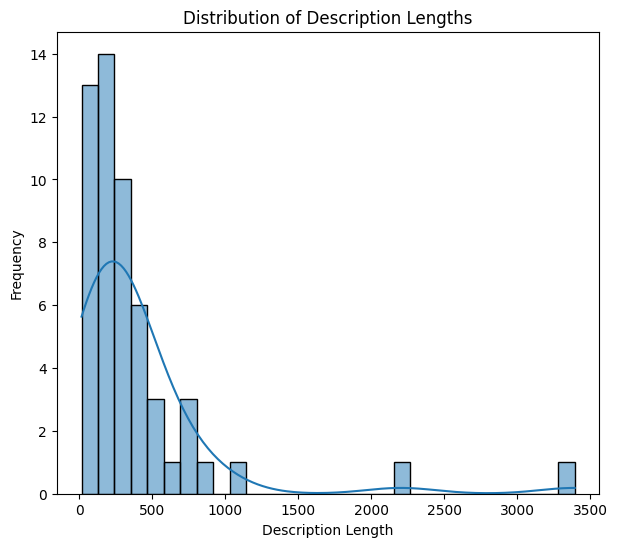

In [ ]:
# Plot the distribution of review lengths
review_lengths = df_reviews['Description'].str.len()
plt.figure(figsize=(7, 6))
sns.histplot(review_lengths, bins=30, kde=True)
plt.title('Distribution of Description Lengths')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()

Peak around 100-200 characters: This indicates that many reviews are concise, likely providing a brief summary or opinion.
Long tail towards higher review lengths: This suggests that there are some longer reviews in the dataset, possibly containing detailed feedback or descriptions.
Sparse distribution with no clear peak: This could indicate that the review lengths vary widely, with no common length dominating the dataset.

**Sentiment Distribution**

In [ ]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()


In [ ]:
# Function to get the sentiment using VADER
def vader_sentiment(text):
    return sid.polarity_scores(text)['compound'] #Computes sentiment scores for the input text,
#returning a dictionary with four scores: positive, negative, neutral, and compound
#Extracts the compound score from the dictionary, which is a normalized score ranging from -1 to +1.


In [ ]:
# Check if the column 'review' exists
if 'review' not in df_reviews.columns:
    # Rename the column 'Description' to 'review'
    df_reviews.rename(columns={'Description': 'review'}, inplace=True)

In [ ]:
# Apply the function to the reviews
df_reviews['vader_sentiment'] = df_reviews['review'].apply(vader_sentiment)

**Visualization of Sentiment Distribution**

**VADAR**

It represents the distribution of sentiment scores (positive, neutral, negative) for a given text or collection of texts as calculated by the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool.It
provides a high-level overview of the overall sentiment expressed in the text.
It is useful for understanding the general sentiment of a text without getting into the specifics of each individual sentiment score.

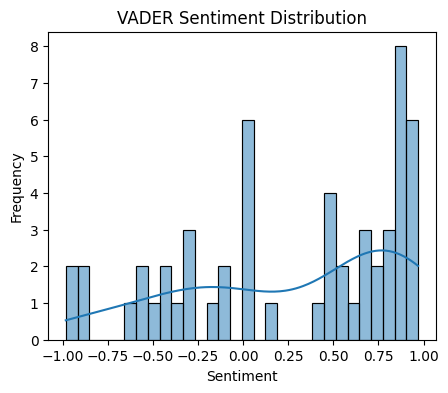

In [ ]:
# Plot the sentiment distribution
plt.figure(figsize=(5, 4))
sns.histplot(df_reviews['vader_sentiment'], bins=30, kde=True)
plt.title('VADER Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


ANALYSIS
A prominent peak around +0.5 to +0.8: This indicates that most reviews are moderately to very positive.
A smaller peak around 0: This suggests a smaller number of neutral reviews.
Few reviews with scores around -0.5 to -1: This means there are few negative reviews.
Such a distribution would suggest that the product is generally well-received, with the majority of reviews being positive, a few neutral, and even fewer negative.

**Sentiment Scores**

In [ ]:
df_reviews['vader_sentiment'] = df_reviews['review'].apply(vader_sentiment)

In [ ]:
df_reviews_grouped = df_reviews.groupby('vader_sentiment')

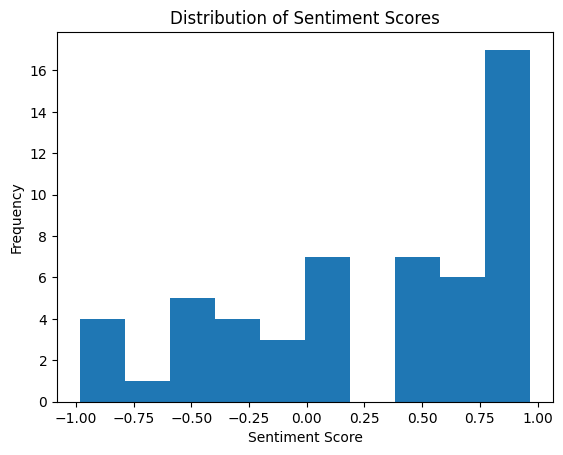

In [ ]:
import matplotlib.pyplot as plt

df_reviews['vader_sentiment'].plot(kind='hist')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

ANALYSIS A Peak at 0.8 to 0.9, which indicates that majority has a strongly positive sentiment towards the product.

**Corelation Analysis**

In [ ]:
# Correlation Analysis
# Example: Investigate correlation between sentiment scores and product ratings
correlation = df_reviews['vader_sentiment']
print("Correlation ", correlation)



Correlation  0     0.8622
1    -0.9020
2     0.9696
3     0.5034
4    -0.1280
5    -0.2732
6     0.7650
7     0.5037
8     0.0000
9    -0.0772
10    0.8687
11   -0.6063
12    0.4753
13   -0.8555
14    0.9440
15    0.4738
16    0.7003
17    0.0000
18    0.8608
19    0.8776
20    0.7783
21   -0.4186
22    0.8422
23    0.9246
24    0.7633
25   -0.9836
26    0.7906
27   -0.1779
28   -0.4084
29    0.8685
30    0.0000
31    0.6249
32   -0.5859
33    0.5574
34    0.4404
35    0.5719
36   -0.5875
37    0.0000
38   -0.2960
39    0.1779
40    0.9118
41    0.9622
42    0.8686
43    0.6808
44    0.8356
45    0.6597
46   -0.2960
47   -0.9482
48    0.9648
49    0.0000
50    0.0000
51    0.8537
52   -0.3400
53   -0.4939
Name: vader_sentiment, dtype: float64


**Sentiment Dynamics**

In [ ]:
# Sentiment Dynamics
# Example: Analyze sentiment shifts within individual reviews
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return filtered_tokens

# Example of sentiment dynamics within the first review
first_review_text = df_reviews['review'].iloc[0]
first_review_tokens = preprocess_text(first_review_text)

# Calculate sentiment score for each token
token_sentiments = [sid.polarity_scores(token)['compound'] for token in first_review_tokens]

# This line uses a list comprehension to iterate over each token in first_review_tokens.
#For each token, it calculates the sentiment score using sid.polarity_scores(token)['compound'].
#The sentiment score is the compound score obtained from VADER sentiment analysis, representing the overall sentiment polarity of the token.
#The resulting list token_sentiments contains the sentiment scores for each token in the review.



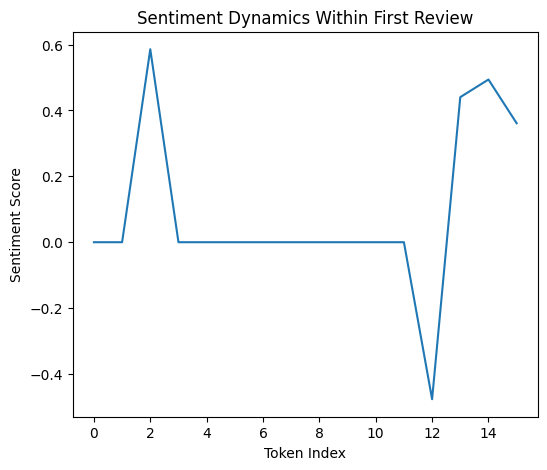

In [ ]:

# Plot sentiment dynamics within the first review
plt.figure(figsize=(6, 5))
plt.plot(token_sentiments)
plt.title('Sentiment Dynamics Within First Review')
plt.xlabel('Token Index')
plt.ylabel('Sentiment Score')
plt.show()

The plot of sentiment dynamics within the first review offers a detailed view of how sentiment is distributed across individual tokens, allowing you to analyze the sentiment progression, identify influential words or phrases, and understand the nuanced sentiment expressed within the text.

**Positive & Negative**

In [ ]:
# Feedback Loop
# Example: Identify areas of concern and positive aspects based on sentiment scores
positive_reviews = df_reviews[df_reviews['vader_sentiment'] > 0.5]
negative_reviews = df_reviews[df_reviews['vader_sentiment'] < -0.5]
neutral_reviews = df_reviews[df_reviews['vader_sentiment'] == 0.5]

In [ ]:
print("Positive aspects based on sentiment:")
print(positive_reviews.head())


Positive aspects based on sentiment:
                Name Stars                                              Title  \
0  Sharad K Upadhyay   5.0     5.0 out of 5 stars\nAmazing and its a blessing   
2               Moiz   5.0  5.0 out of 5 stars\nOne of the best CGM and ap...   
3        Zubin Mehta   5.0                       5.0 out of 5 stars\nAccuracy   
6               Yash   5.0                        5.0 out of 5 stars\nBiohack   
7         Threesixty   3.0  3.0 out of 5 stars\nAbbott sensor cartridge al...   

  Date                                             review  vader_sentiment  
0  N/A  Worked wonders. This is amazing. I am now in c...           0.8622  
2  N/A  The user interface of the app is fantastic and...           0.9696  
3  N/A  Highly accurate.  Very useful and a must for a...           0.5034  
6  N/A  First time user of this magical device. It is ...           0.7650  
7  N/A  Sensor cartridge already in fired position out...           0.5037  


In [ ]:
print("Neutral aspects based on sentiment:")
print(neutral_reviews.head())


Neutral aspects based on sentiment:
Empty DataFrame
Columns: [Name, Stars, Title, Date, review, vader_sentiment]
Index: []


In [ ]:

print("\nAreas of concern based on sentiment:")
print(negative_reviews.head())


Areas of concern based on sentiment:
               Name Stars                                              Title  \
1           Ashok A   1.0  1.0 out of 5 stars\nUltraHuman is an UltraScam...   
11  Amazon Customer   5.0  5.0 out of 5 stars\nIt made me change my long ...   
13           Daniel   1.0       1.0 out of 5 stars\nSensor did not work !!!!   
25       Ultrahuman   1.0  1.0 out of 5 stars\nDon’t buy as they deny refund   
32            Sorab   1.0                   1.0 out of 5 stars\nDoesn’t work   

   Date                                             review  vader_sentiment  
1   N/A  I bought it and after the first reading when I...          -0.9020  
11  N/A  I have known for a long time that it was not g...          -0.6063  
13  N/A  The sensor did not work . It showed the same l...          -0.8555  
25  N/A  I brought this item and same day I complaint o...          -0.9836  
32  N/A  The sensor doesn’t work. I’ve tried taking a g...          -0.5859  


In [ ]:
from nltk.tokenize import word_tokenize

def extract_key_phrases(text, sentiment):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.isalpha()]
    if sentiment == 'positive':
      return ' '.join([token for token in filtered_tokens if sid.polarity_scores(token)['compound'] > 0])
    else:
        return ' '.join([token for token in filtered_tokens if sid.polarity_scores(token)['compound'] < 0])

In [ ]:
df_reviews["sentiment"] = [sid.polarity_scores(review)["compound"] for review in df_reviews["review"]]

# **EDA 2**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_reviews = pd.read_csv("reviewsall.csv")

**Data Structure**

In [ ]:
df_reviews.info()
df_reviews.head()
df_reviews.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         54 non-null     object 
 1   Stars        50 non-null     float64
 2   Title        54 non-null     object 
 3   Date         0 non-null      float64
 4   Description  54 non-null     object 
dtypes: float64(2), object(3)
memory usage: 2.2+ KB


,Stars,Date
count,50.000000,0.0
mean,3.320000,NaN
std,1.910658,NaN
min,1.000000,NaN
25%,1.000000,NaN
50%,5.000000,NaN
75%,5.000000,NaN
max,5.000000,NaN


In [ ]:
df_reviews.isnull().sum()

Name            0
Stars           4
Title           0
Date           54
Description     0
dtype: int64

In [ ]:
df_reviews.head(2)

,Name,Stars,Title,Date,Description
0,Sharad K Upadhyay,5.0,5.0 out of 5 stars\nAmazing and its a blessing,NaN,Worked wonders. This is amazing. I am now in c...
1,Ashok A,1.0,1.0 out of 5 stars\nUltraHuman is an UltraScam...,NaN,I bought it and after the first reading when I...


**Visualizations of Positive & Negative Reviews**

In [ ]:
positive_reviews_text = positive_reviews['review'].tolist()
negative_reviews_text = negative_reviews['review'].tolist()

In [ ]:
positive_reviews_text = list(map(str, positive_reviews_text))
negative_reviews_text = list(map(str, negative_reviews_text))

In [ ]:
positive_words = ' '.join(positive_reviews_text)
negative_words = ' '.join(negative_reviews_text)

In [ ]:
wordcloud = WordCloud(width=800, height=600, background_color='white').generate(positive_words)

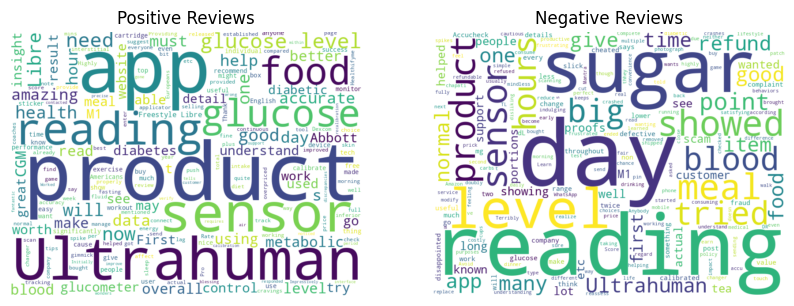

In [ ]:
# Ensure dataframes are not empty and contain string data
if positive_reviews.empty or negative_reviews.empty or not isinstance(positive_reviews['review'].iloc[0], str):
    raise ValueError("Dataframes must not be empty and review_text column should contain strings.")

# Generate word clouds with stop words disabled
positive_wordcloud = WordCloud(width=800, height=600, background_color='white', stopwords=None).generate(positive_words)
negative_wordcloud = WordCloud(width=800, height=600, background_color='white', stopwords=None).generate(negative_words)

# Plot word clouds
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')

plt.show()

# **Data Exploration**

**Number of Words**

In [ ]:
df_reviews['word_count'] = df_reviews['Description'].apply(lambda x: len(str(x).split(" ")))
df_reviews[['Description','word_count']].head()

,Description,word_count
0,Worked wonders. This is amazing. I am now in c...,44
1,I bought it and after the first reading when I...,159
2,The user interface of the app is fantastic and...,154
3,Highly accurate. Very useful and a must for a...,24
4,I have completed 15 days and now I have a fair...,76


**Number of Characters**

In [ ]:
df_reviews['char_count'] = df_reviews['Description'].str.len() ## this also includes spaces
df_reviews[['Description','char_count']].head()

,Description,char_count
0,Worked wonders. This is amazing. I am now in c...,209
1,I bought it and after the first reading when I...,867
2,The user interface of the app is fantastic and...,1034
3,Highly accurate. Very useful and a must for a...,136
4,I have completed 15 days and now I have a fair...,401


**Avarage Word Lenght**

In [ ]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

df_reviews['avg_word'] = df_reviews['Description'].apply(lambda x: avg_word(x))
df_reviews[['Description','avg_word']].head()

,Description,avg_word
0,Worked wonders. This is amazing. I am now in c...,3.860465
1,I bought it and after the first reading when I...,4.459119
2,The user interface of the app is fantastic and...,5.720779
3,Highly accurate. Very useful and a must for a...,5.380952
4,I have completed 15 days and now I have a fair...,4.289474


**Number of Stop Words**

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df_reviews['stopwords'] = df_reviews['Description'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
df_reviews[['Description','stopwords']].head()

,Description,stopwords
0,Worked wonders. This is amazing. I am now in c...,19
1,I bought it and after the first reading when I...,62
2,The user interface of the app is fantastic and...,55
3,Highly accurate. Very useful and a must for a...,7
4,I have completed 15 days and now I have a fair...,35


**Number of Numerics**

In [ ]:
df_reviews['numerics'] = df_reviews['Description'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
df_reviews[['Description','numerics']].head()

,Description,numerics
0,Worked wonders. This is amazing. I am now in c...,0
1,I bought it and after the first reading when I...,0
2,The user interface of the app is fantastic and...,0
3,Highly accurate. Very useful and a must for a...,0
4,I have completed 15 days and now I have a fair...,3


**Number of UpperCase Words**

In [ ]:
df_reviews['upper'] = df_reviews['Description'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
df_reviews[['Description','upper']].head()

,Description,upper
0,Worked wonders. This is amazing. I am now in c...,3
1,I bought it and after the first reading when I...,5
2,The user interface of the app is fantastic and...,3
3,Highly accurate. Very useful and a must for a...,0
4,I have completed 15 days and now I have a fair...,5


In [ ]:
df_reviews.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

# **Data Visualization**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_reviews = pd.read_csv('reviewsall.csv')

**Bar Chart of average stars per name**

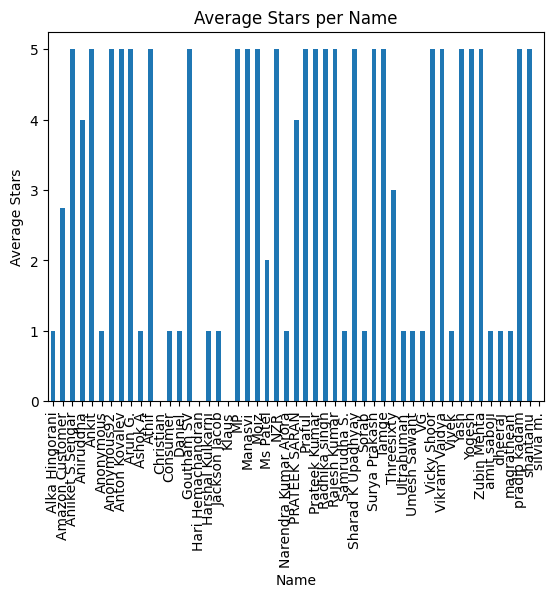

In [ ]:
df_reviews.groupby('Name')['Stars'].mean().plot(kind='bar')
plt.xlabel('Name')
plt.ylabel('Average Stars')
plt.title('Average Stars per Name')
plt.show()

**Scatter Plot of Stars vs Description Lenght**

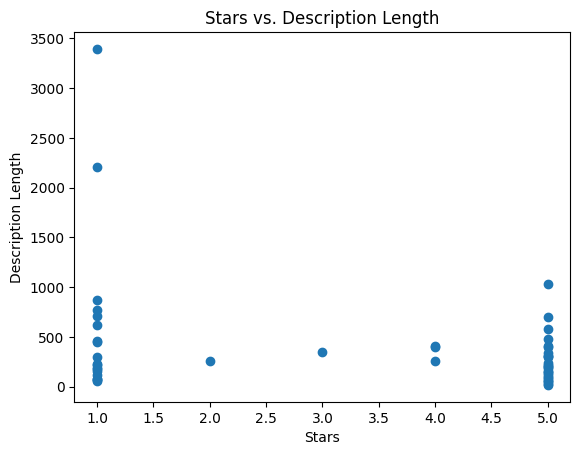

In [ ]:
df_reviews['Description_Length'] = df_reviews['Description'].str.len()
plt.scatter(df_reviews['Stars'], df_reviews['Description_Length'])
plt.xlabel('Stars')
plt.ylabel('Description Length')
plt.title('Stars vs. Description Length')
plt.show()

**Histogram of Star Ratings**

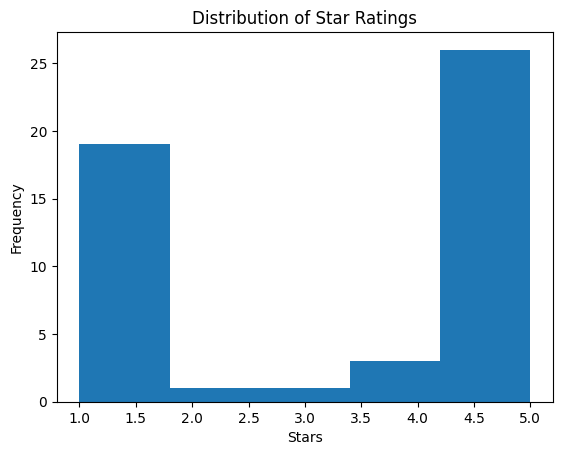

In [ ]:
plt.hist(df_reviews['Stars'], bins=5)
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.title('Distribution of Star Ratings')
plt.show()

**Pie Chart and Bar Chart of Star Ratings**

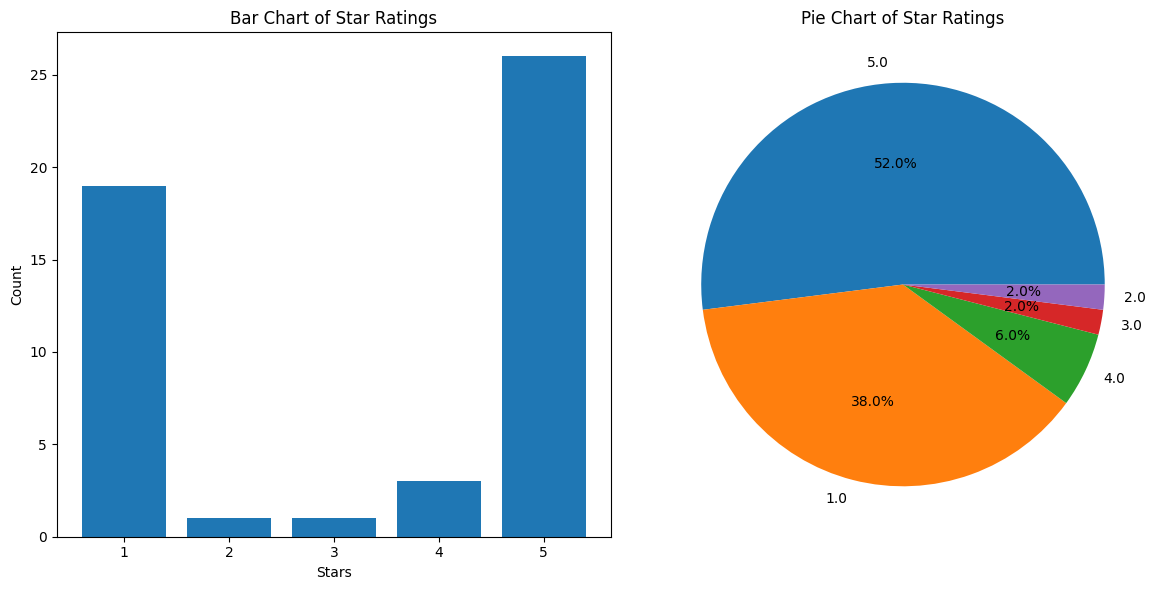

In [ ]:
import matplotlib.pyplot as plt

# Get data
df_reviews = pd.read_csv('reviewsall.csv')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart of star ratings
star_counts = df_reviews['Stars'].value_counts()
ax1.bar(star_counts.index, star_counts.values)
ax1.set_xlabel('Stars')
ax1.set_ylabel('Count')
ax1.set_title('Bar Chart of Star Ratings')

# Pie chart of star ratings
ax2.pie(star_counts, labels=star_counts.index, autopct='%1.1f%%')
ax2.set_title('Pie Chart of Star Ratings')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

**Word Cloud of Descriptions**

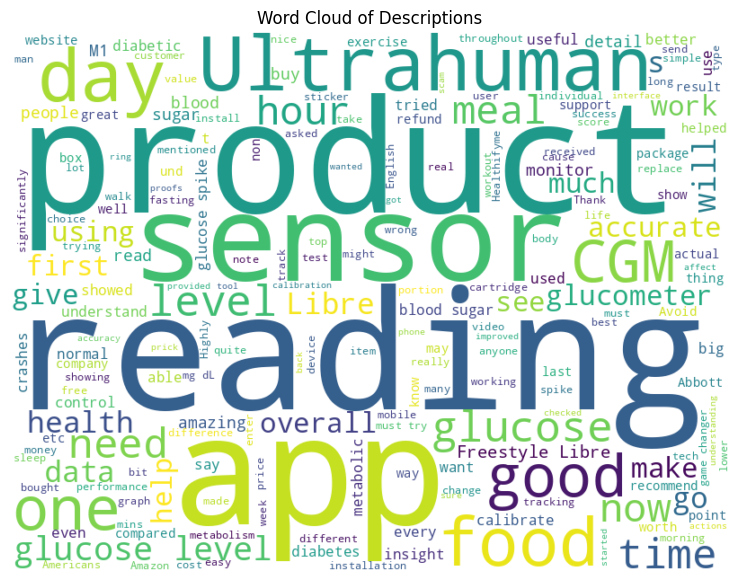

In [ ]:
from wordcloud import WordCloud
text = ' '.join(df_reviews['Description'].tolist())
wordcloud = WordCloud(width=800, height=600, background_color='white').generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Descriptions')
plt.show()

**WordCloud of Positive & Negative Words/Reviews**

In [ ]:
positive_words = ' '.join(positive_reviews_text)
negative_words = ' '.join(negative_reviews_text)

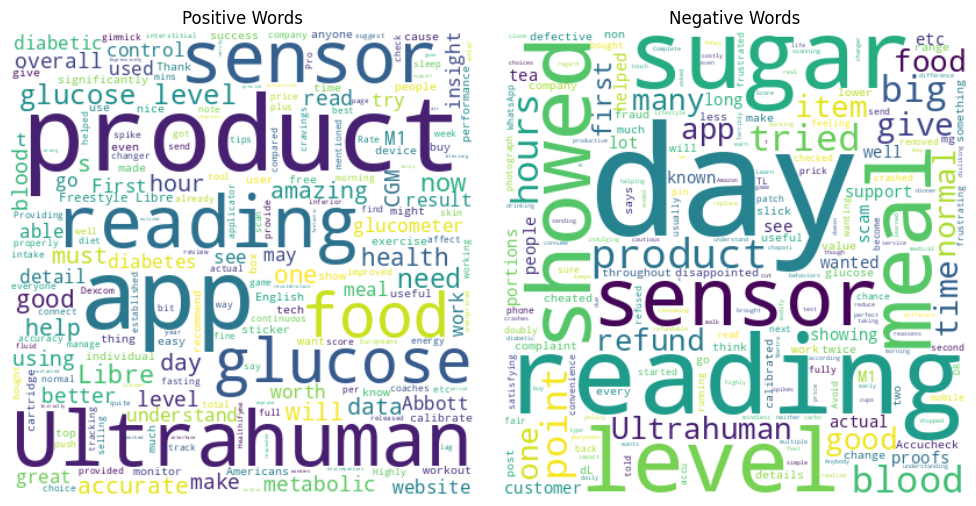

In [ ]:

import matplotlib.pyplot as plt

# Create word clouds
positive_wordcloud = WordCloud(width=400, height=400, background_color='white').generate(positive_words)
negative_wordcloud = WordCloud(width=400, height=400, background_color='white').generate(negative_words)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot word clouds
ax1.imshow(positive_wordcloud, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Positive Words')

ax2.imshow(negative_wordcloud, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Negative Words')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# **BasicText Preprocessing**

In [ ]:
data = df_reviews[['Description']]
data.head(5)

,Description
0,Worked wonders. This is amazing. I am now in c...
1,I bought it and after the first reading when I...
2,The user interface of the app is fantastic and...
3,Highly accurate. Very useful and a must for a...
4,I have completed 15 days and now I have a fair...


In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Description'] = data['Description'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [ ]:
data

,Description
0,worked wonders. this amazing. i control glucos...
1,i bought first reading i tried read second tim...
2,the user interface app fantastic provides prec...
3,highly accurate. very useful must anyone wants...
4,i completed 15 days i fairly good idea i avoid...
5,received package 31st march 2024 freestyle lib...
6,first time user magical device. it must try pe...
7,sensor cartridge already fired position box. w...
8,the media could loaded. hiwe used ultra human ...
9,been using ultrahuman app checking glucose spi...


In [ ]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Description"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/54 [00:00<?, ?it/s]

In [ ]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df_reviews.Description})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,worked wonder amazing control glucose level se...,Worked wonders. This is amazing. I am now in c...
1,bought first reading tried read second time pa...,I bought it and after the first reading when I...
2,user interface app fantastic provides precise ...,The user interface of the app is fantastic and...
3,highly accurate useful must anyone want interm...,Highly accurate. Very useful and a must for a...
4,completed day fairly good idea avoid eating av...,I have completed 15 days and now I have a fair...


# **Text PreProcessing Techniques**

**Removing @names**

In [ ]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [ ]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(5)

,Clean_Reviews,Uncleaned_Reviews
0,worked wonder amazing control glucose level se...,Worked wonders. This is amazing. I am now in c...
1,bought first reading tried read second time pa...,I bought it and after the first reading when I...
2,user interface app fantastic provides precise ...,The user interface of the app is fantastic and...
3,highly accurate useful must anyone want interm...,Highly accurate. Very useful and a must for a...
4,completed day fairly good idea avoid eating av...,I have completed 15 days and now I have a fair...


**Removing Links**

In [ ]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(5)

,Clean_Reviews,Uncleaned_Reviews
0,worked wonder amazing control glucose level se...,Worked wonders. This is amazing. I am now in c...
1,bought first reading tried read second time pa...,I bought it and after the first reading when I...
2,user interface app fantastic provides precise ...,The user interface of the app is fantastic and...
3,highly accurate useful must anyone want interm...,Highly accurate. Very useful and a must for a...
4,completed day fairly good idea avoid eating av...,I have completed 15 days and now I have a fair...


**Removing Reviews with Empty Texts**

In [ ]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(5)

,Clean_Reviews,Uncleaned_Reviews
0,worked wonder amazing control glucose level se...,Worked wonders. This is amazing. I am now in c...
1,bought first reading tried read second time pa...,I bought it and after the first reading when I...
2,user interface app fantastic provides precise ...,The user interface of the app is fantastic and...
3,highly accurate useful must anyone want interm...,Highly accurate. Very useful and a must for a...
4,completed day fairly good idea avoid eating av...,I have completed 15 days and now I have a fair...


**Dropping Duplicate Rows**

In [ ]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(5)

,Clean_Reviews,Uncleaned_Reviews
0,worked wonder amazing control glucose level se...,Worked wonders. This is amazing. I am now in c...
1,bought first reading tried read second time pa...,I bought it and after the first reading when I...
2,user interface app fantastic provides precise ...,The user interface of the app is fantastic and...
3,highly accurate useful must anyone want interm...,Highly accurate. Very useful and a must for a...
4,completed day fairly good idea avoid eating av...,I have completed 15 days and now I have a fair...


**Resetting Index**

In [ ]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(5)

,Clean_Reviews,Uncleaned_Reviews
0,worked wonder amazing control glucose level se...,Worked wonders. This is amazing. I am now in c...
1,bought first reading tried read second time pa...,I bought it and after the first reading when I...
2,user interface app fantastic provides precise ...,The user interface of the app is fantastic and...
3,highly accurate useful must anyone want interm...,Highly accurate. Very useful and a must for a...
4,completed day fairly good idea avoid eating av...,I have completed 15 days and now I have a fair...


**Removing Punctuations, numbers and Characters**

In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(5)

,Clean_Reviews,Uncleaned_Reviews
0,worked wonder amazing control glucose level se...,Worked wonders. This is amazing. I am now in c...
1,bought first reading tried read second time pa...,I bought it and after the first reading when I...
2,user interface app fantastic provides precise ...,The user interface of the app is fantastic and...
3,highly accurate useful must anyone want interm...,Highly accurate. Very useful and a must for a...
4,completed day fairly good idea avoid eating av...,I have completed 15 days and now I have a fair...


**Tokenizing Clean Reviews**

In [ ]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['bought', 'first', 'reading', 'tried', 'read', 'second', 'time', 'patch', 'started', 'showing', 'blood', 'sugar', 'level', 'crashed', 'reading', 'feeling', 'well', 'doubly', 'sure', 'checked', 'blood', 'level', 'pin', 'prick', 'accu', 'showed', 'wanting', 'give', 'convenience', 'mobile', 'phone', 'reading', 'wanted', 'give', 'ultrahuman', 'fair', 'chance', 'also', 'whatsapp', 'support', 'told', 'usually', 'reading', 'become', 'good', 'day', 'tried', 'many', 'hour', 'next', 'day', 'fully', 'frustrated', 'removed', 'send', 'back', 'refund', 'many', 'frustrating', 'day', 'complaint', 'many', 'people', 'satisfying', 'proof', 'like', 'photograph', 'reading', 'etc', 'refused', 'give', 'refund', 'tl', 'dr', 'avoid', 'ultrahuman', 'big', 'scam', 'people', 'running', 'scam', 'understanding', 'customer', 'service'])

In [ ]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [worked, wonder, amazing, control, glucose, le...
1    [bought, first, reading, tried, read, second, ...
2    [user, interface, app, fantastic, provides, pr...
3    [highly, accurate, useful, must, anyone, want,...
4    [completed, day, fairly, good, idea, avoid, ea...
5    [received, package, st, march, freestyle, libr...
6    [first, time, user, magical, device, must, try...
7    [sensor, cartridge, already, fired, position, ...
8    [medium, could, loaded, hiwe, used, ultra, hum...
9    [using, ultrahuman, app, checking, glucose, sp...
Name: Clean_Reviews, dtype: object

**Converting words to Stemmer**

In [ ]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [ ]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx.head(5)

,stemmed
0,work wonder amaz control glucos level see leve...
1,bought first read tri read second time patch s...
2,user interfac app fantast provid precis result...
3,high accur use must anyon want intermitt fast ...
4,complet day fair good idea avoid eat avoid spi...


**Converting words to lemma**

In [ ]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy.head(5)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,stemmed
0,worked wonder amazing control glucose level se...
1,bought first reading tried read second time pa...
2,user interface app fantastic provides precise ...
3,highly accurate useful must anyone want interm...
4,completed day fairly good idea avoid eating av...


# **Basic Feature Extraction**

**Applying bag of words with N grams (Bigrams & Trigrams)**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [ ]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/54 [00:00<?, ?it/s]

In [ ]:
corpus[3]

'highli accur use must anyon want intermitt fast diabet reduct weight loss fit'

In [ ]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

(54, 4403)

In [ ]:
feature_names = cv.get_feature_names_out()
print(feature_names[:20])

['abbot' 'abbot sell' 'abbot sell well' 'abbott' 'abbott freestyl'
 'abbott freestyl libr' 'abbott market' 'abbott market gimmick'
 'abbott releas' 'abbott releas libr' 'abl' 'abl control'
 'abl control glucos' 'abl control manag' 'abl correl' 'abl correl spike'
 'abl instal' 'abl instal properli' 'abl understand'
 'abl understand exercis']


In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
# Import the CountVectorizer module
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer object
cv = CountVectorizer(max_features=5000, ngram_range=(1, 3))

# Fit the CountVectorizer to the corpus
X = cv.fit_transform(corpus).toarray()

# Get the feature names
feature_names = cv.get_feature_names_out()

# Create a DataFrame with the feature names as columns
count_df_reviews = pd.DataFrame(X, columns=feature_names)

In [ ]:
count_df_reviews.head(5)

,abbot,abbot sell,abbot sell well,abbott,abbott freestyl,abbott freestyl libr,abbott market,abbott market gimmick,abbott releas,abbott releas libr,...,zu teuer,zu teuer ansonsten,zur,zur ckgesendet,zur ckgesendet euro,zwei,zwei sensoren,zwei sensoren handelt,zweiten,zweiten punkt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**TF IDF Vectorizer**

In [ ]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/54 [00:00<?, ?it/s]

In [ ]:
corpus[4]

'complet day fairli good idea avoid eat avoid spike sugar level firstli read match blood sugar monitor differ tha time compar blood monitor even tri sync machin get correct would given star accur reason price'

In [ ]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [ ]:
X.shape

(54, 4403)

In [ ]:
!pip install scikit-learn

# Create a TfidfVectorizer object
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))

# Fit the vectorizer to the corpus
X = tfidf_v.fit_transform(corpus).toarray()

In [ ]:
feature_names = [tfidf_v.vocabulary_[feature] for feature in tfidf_v.vocabulary_.keys()][:20]

In [ ]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

**Named Entity Recognition (NER)**

In [ ]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'worked wonder amazing control glucose level see level app tell could gone wrong improve blessing thank bought first reading tried read second time patch started showing blood sugar level crashed reading feeling well doubly sure checked blood level pin prick accu showed wanting give convenience mobile phone reading wanted give ultrahuman fair chance also whatsapp support told usually reading become good day tried many hour next day fully frustrated removed send back refund many frustrating day complaint many people satisfying proof like photograph reading etc refused give refund tl dr avoid ultrahuman big scam people running scam understanding customer service user interface app fantastic provides precise result initially requires hour calibration period noticed discrepancy accuracy contacted customer support impressively responded within hour provided glucometer verify app reading recalibration app accuracy improved significantly also user ultrahuman air ring appreciate seamlessly int

In [ ]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[:50]:
    print(token,token.pos_)

worked VERB
wonder NOUN
amazing ADJ
control NOUN
glucose NOUN
level NOUN
see NOUN
level NOUN
app NOUN
tell NOUN
could AUX
gone VERB
wrong ADJ
improve NOUN
blessing NOUN
thank NOUN
bought VERB
first ADJ
reading NOUN
tried VERB
read VERB
second ADJ
time NOUN
patch NOUN
started VERB
showing VERB
blood NOUN
sugar NOUN
level NOUN
crashed VERB
reading NOUN
feeling VERB
well ADV
doubly ADV
sure ADV
checked VERB
blood NOUN
level NOUN
pin PROPN
prick PROPN
accu PROPN
showed VERB
wanting VERB
give VERB
convenience NOUN
mobile ADJ
phone NOUN
reading NOUN
wanted VERB
give VERB


In [ ]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['data', 'analysis', 'app', 'reminder', 'prompting', 'morning', 'day', 'meal', 'suggesting', 'walk', 'action', 'glucose', 'detected', 'tool', 'understanding', 'glucose', 'level', 'meal', 'affect', 'allowing', 'make', 'adjustment', 'got', 'wife', 'impressed', 'product', 'go', 'choice', 'endorsement', 'want', 'fasting', 'diabetes', 'reduction', 'weight', 'loss', 'fitness', 'completed', 'day', 'idea', 'avoid', 'eating', 'avoid', 'sugar', 'level', 'reading', 'matching', 'blood', 'sugar', 'monitor', 'difference', 'tha', 'time', 'compared', 'blood', 'monitor', 'trying', 'sync', 'machine', 'corrected', 'given', 'star', 'priced', 'received', 'package', 'sensor', 'package', 'reading', 'march', 'rendering', 'install', 'malpractice', 'hope', 'take', 'note', 'time', 'user', 'device', 'try', 'person', 'know', 'cycle', 'energy', 'level', 'body', 'tried', 'fasting', 'day', 'workout', 'made', 'make', 'morning', 'wake', 'meal', 'cause', 'gamechanger', 'kudos', 'team', 'developing', 'product', 'try']


In [ ]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,reading,30
1,glucose,27
2,product,27
3,sensor,25
4,level,22
5,day,20
6,app,18
7,food,17
8,time,11
9,blood,11


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

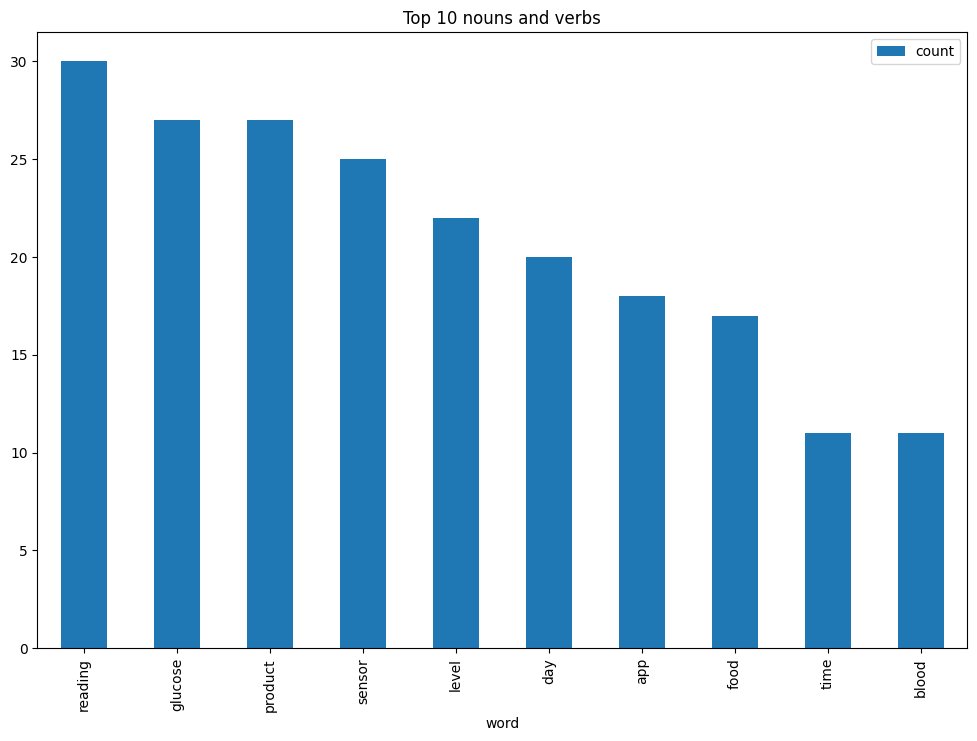

In [ ]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

# **Sentiment Fetching**

In [ ]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

**NLTK's SentimentIntensityAnalyser**

In [ ]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,count
Clean_Reviews,
pos,40
neg,14


In [ ]:
dataframe.Clean_Reviews[8]

'medium could loaded hiwe used ultra human time arrived day installed sensor last night today seems work go unopened pack'

In [ ]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,worked wonder amazing control glucose level se...,"{'neg': 0.117, 'neu': 0.415, 'pos': 0.468, 'co..."
1,bought first reading tried read second time pa...,"{'neg': 0.207, 'neu': 0.602, 'pos': 0.191, 'co..."
2,user interface app fantastic provides precise ...,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp..."
3,highly accurate useful must anyone want interm...,"{'neg': 0.129, 'neu': 0.503, 'pos': 0.368, 'co..."
4,completed day fairly good idea avoid eating av...,"{'neg': 0.112, 'neu': 0.814, 'pos': 0.074, 'co..."


In [ ]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,worked wonder amazing control glucose level se...,"{'neg': 0.117, 'neu': 0.415, 'pos': 0.468, 'co...",0.8519
1,bought first reading tried read second time pa...,"{'neg': 0.207, 'neu': 0.602, 'pos': 0.191, 'co...",-0.5709
2,user interface app fantastic provides precise ...,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp...",0.9817
3,highly accurate useful must anyone want interm...,"{'neg': 0.129, 'neu': 0.503, 'pos': 0.368, 'co...",0.5070
4,completed day fairly good idea avoid eating av...,"{'neg': 0.112, 'neu': 0.814, 'pos': 0.074, 'co...",-0.1280


In [ ]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,worked wonder amazing control glucose level se...,"{'neg': 0.117, 'neu': 0.415, 'pos': 0.468, 'co...",0.8519,Positive
1,bought first reading tried read second time pa...,"{'neg': 0.207, 'neu': 0.602, 'pos': 0.191, 'co...",-0.5709,Negative
2,user interface app fantastic provides precise ...,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp...",0.9817,Positive
3,highly accurate useful must anyone want interm...,"{'neg': 0.129, 'neu': 0.503, 'pos': 0.368, 'co...",0.5070,Positive
4,completed day fairly good idea avoid eating av...,"{'neg': 0.112, 'neu': 0.814, 'pos': 0.074, 'co...",-0.1280,Negative
5,received package st march freestyle libre sens...,"{'neg': 0.106, 'neu': 0.72, 'pos': 0.174, 'com...",0.2023,Positive
6,first time user magical device must try person...,"{'neg': 0.106, 'neu': 0.657, 'pos': 0.237, 'co...",0.7650,Positive
7,sensor cartridge already fired position box co...,"{'neg': 0.202, 'neu': 0.588, 'pos': 0.209, 'co...",-0.1779,Negative
8,medium could loaded hiwe used ultra human time...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
9,using ultrahuman app checking glucose spike ov...,"{'neg': 0.064, 'neu': 0.872, 'pos': 0.064, 'co...",-0.0018,Neutral


In [ ]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<Axes: xlabel='sentiment', ylabel='count'>

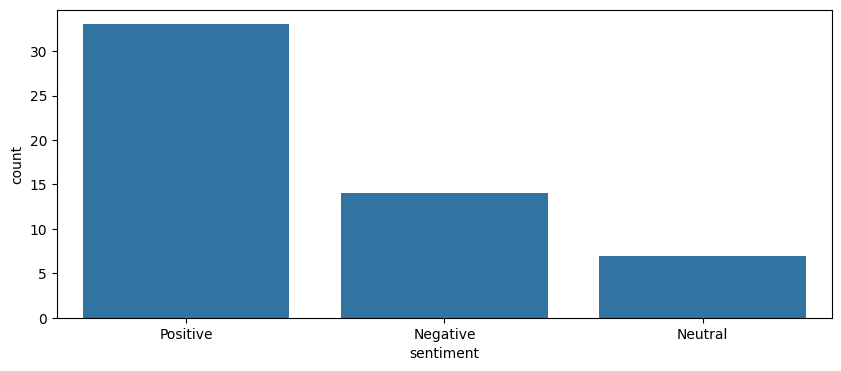

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='sentiment',data=df)

<ipython-input-170-18ae628d4800>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='compound', ylabel='Density'>

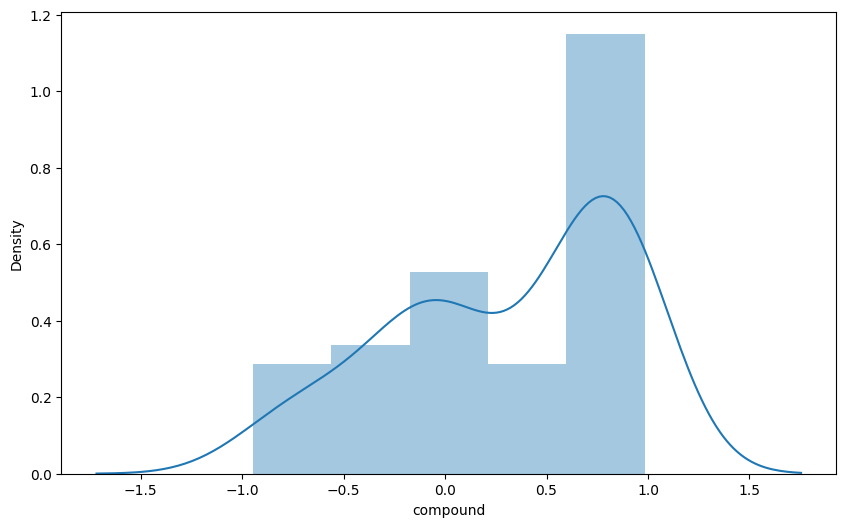

In [ ]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(10,6))
sns.distplot(df['compound'])

In [ ]:
df["word_count"] = df["Review"].apply(lambda x: len(x.split()))

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='compound'>

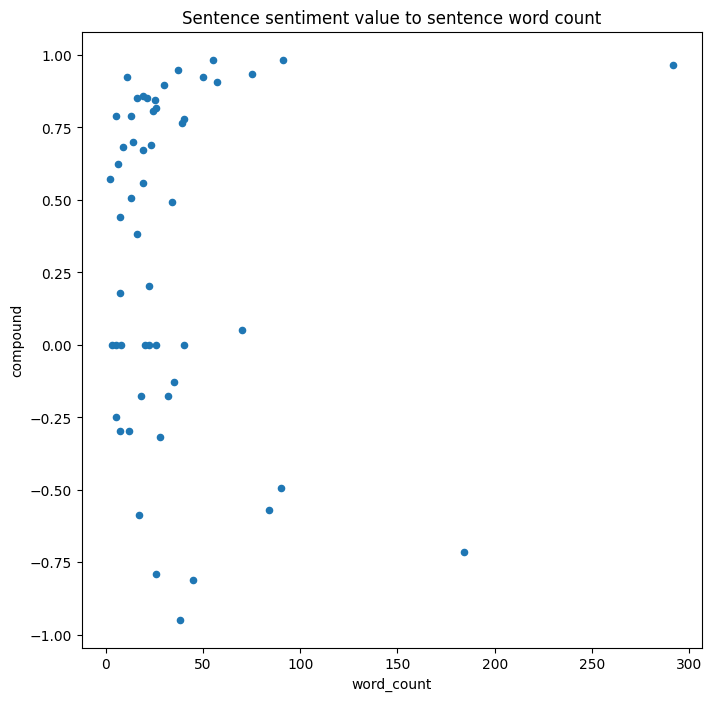

In [ ]:
# Correlation analysis
df["word_count"] = df["Review"].apply(lambda x: len(x.split()))
df.plot.scatter(x="word_count", y="compound", figsize=(8, 8), title="Sentence sentiment value to sentence word count")

**Using Textblob**

In [ ]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,count
Clean_Reviews,
pos,46
neg,8


In [ ]:
 # subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,worked wonder amazing control glucose level se...,Worked wonders. This is amazing. I am now in c...,0.900000,0.050000
1,bought first reading tried read second time pa...,I bought it and after the first reading when I...,0.429514,0.156250
2,user interface app fantastic provides precise ...,The user interface of the app is fantastic and...,0.478846,0.309615
3,highly accurate useful must anyone want interm...,Highly accurate. Very useful and a must for a...,0.316667,0.350000
4,completed day fairly good idea avoid eating av...,I have completed 15 days and now I have a fair...,0.541667,0.387500


Text(0, 0.5, 'Subjectivity')

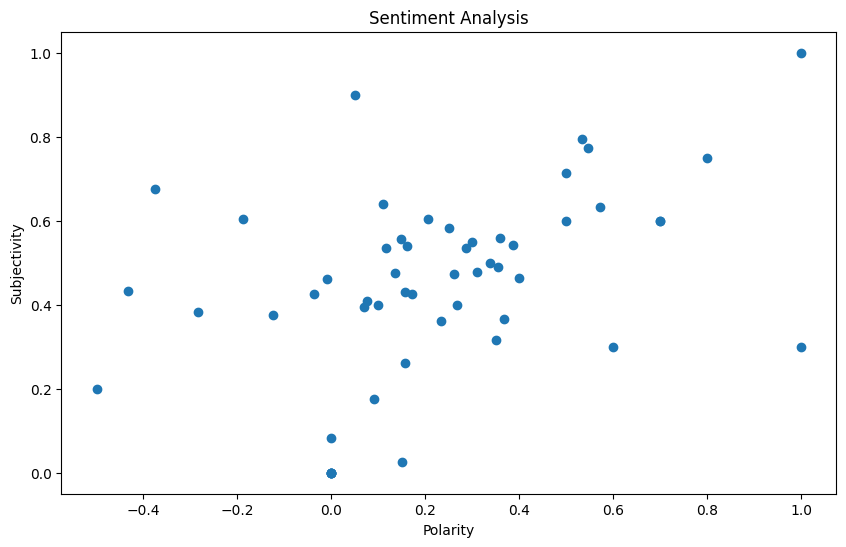

In [ ]:
f, axes = plt.subplots(figsize = (10,6))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

# **Visualizations 2**

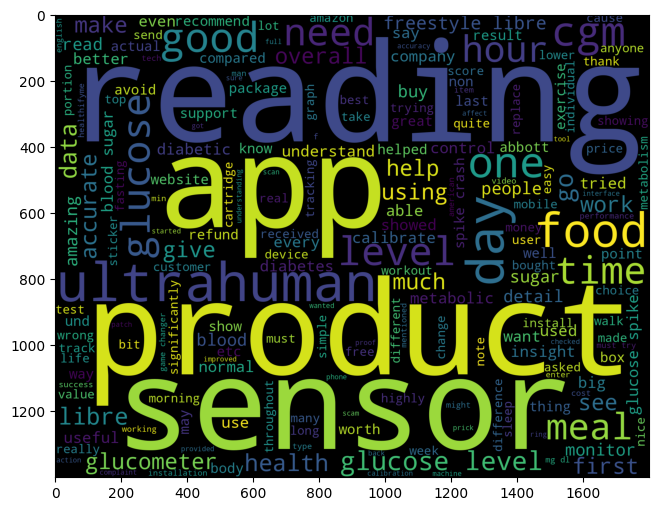

In [ ]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(10,6))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

# **Model Building**

In [ ]:
sentiment= df['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews, sentiment, test_size=0.2)

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

In [ ]:
# In ipython-input-179-ed5006273275
sentiment = df['sentiment'].to_numpy()

In [ ]:
# In ipython-input-179-ed5006273275
sentiment = df['sentiment'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Load the data
Review = df['Review'].to_numpy()
sentiment = df['sentiment'].to_numpy()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Review, sentiment, test_size=0.2)

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the training data
X_train = vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test = vectorizer.transform(X_test)

# Create a Multinomial Naive Bayes model
model = MultinomialNB()

# Fit the model to the training data
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.6363636363636364


**Naive Bayes Accuracy is 0.6363**

**Logistic Regression**

In [ ]:
!pip install scikit-learn

In [ ]:
print(f"Type of X_train: {type(X_train)}")
print(f"Type of y_train: {type(y_train)}")

Type of X_train: <class 'numpy.ndarray'>
Type of y_train: <class 'numpy.ndarray'>


In [ ]:
print(f"Data type of X_train: {X_train.dtype}")
print(f"Data type of y_train: {y_train.dtype}")

Data type of X_train: object
Data type of y_train: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test_tfidf = vectorizer.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test_tfidf)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.45454545454545453


**SVM**

In [ ]:
from sklearn.svm import SVC

# Create an SVC model
model = SVC()

# Train the model
model.fit(X_train_tfidf, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test_tfidf)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.45454545454545453


Got low accuracy scores. The small size of Dataset might be the reason for low accuracy of models.

# **Data Augmentation**

In [ ]:
!pip install nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 3.5 MB/s eta 0:00:00


In [ ]:
from nlpaug.augmenter.word import SynonymAug

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert X_test to numerical values
le = LabelEncoder()
X_test_encoded = le.fit_transform(X_test)

# Reshape X_test_encoded into a 2D array
X_test_encoded = X_test_encoded.reshape(-1, 1)

# Predict using the encoded data
y_pred = model.predict(X_test_encoded)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict using the encoded data
y_pred = model.predict(X_test_encoded)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.5454545454545454
Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.00      0.00      0.00         1
    Positive       0.55      1.00      0.71         6

    accuracy                           0.55        11
   macro avg       0.18      0.33      0.24        11
weighted avg       0.30      0.55      0.39        11



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Combine X_train and X_test
X_combined = np.concatenate((X_train, X_test))

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder on the combined data
le.fit(X_combined)

# Transform X_train and X_test
X_train_encoded = le.transform(X_train)
X_test_encoded = le.transform(X_test)

# Reshape data
X_train_encoded = X_train_encoded.reshape(-1, 1)
X_test_encoded = X_test_encoded.reshape(-1, 1)

# Train the model
model = MultinomialNB()
model.fit(X_train_encoded, y_train)

# Make predictions
y_pred = model.predict(X_test_encoded)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5454545454545454


In [ ]:
from sklearn.linear_model import LogisticRegression

# Combine X_train and X_test
X_combined = np.concatenate((X_train, X_test))

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder on the combined data
le.fit(X_combined)

# Transform X_train and X_test
X_train_encoded = le.transform(X_train)
X_test_encoded = le.transform(X_test)

# Reshape data
X_train_encoded = X_train_encoded.reshape(-1, 1)
X_test_encoded = X_test_encoded.reshape(-1, 1)

# Train the model
model = LogisticRegression()
model.fit(X_train_encoded, y_train)

# Make predictions
y_pred = model.predict(X_test_encoded)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5454545454545454


In [ ]:
from sklearn.svm import SVC

# Combine X_train and X_test
X_combined = np.concatenate((X_train, X_test))

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder on the combined data
le.fit(X_combined)

# Transform X_train and X_test
X_train_encoded = le.transform(X_train)
X_test_encoded = le.transform(X_test)

# Reshape data
X_train_encoded = X_train_encoded.reshape(-1, 1)
X_test_encoded = X_test_encoded.reshape(-1, 1)

# Train the model
model = SVC()
model.fit(X_train_encoded, y_train)

# Make predictions
y_pred = model.predict(X_test_encoded)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5454545454545454


# **Model Building NB**

In [ ]:
sentiment= df['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews, sentiment, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

In [ ]:
# In ipython-input-179-ed5006273275
sentiment = df['sentiment'].to_numpy()

In [ ]:
# In ipython-input-179-ed5006273275
sentiment = df['sentiment'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Load the data
Review = df['Review'].to_numpy()
sentiment = df['sentiment'].to_numpy()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Review, sentiment, test_size=0.2)

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the training data
X_train = vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test = vectorizer.transform(X_test)

# Create a Multinomial Naive Bayes model
model = MultinomialNB()

# Fit the model to the training data
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.7272727272727273


**Accuracy is 0.7272**

**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(Review, sentiment, test_size=0.2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Load the data
Review = df['Review'].to_numpy()
sentiment = df['sentiment'].to_numpy()

# Split the data into training and test sets
X_train, X_val, y_train, y_val = train_test_split(Review, sentiment, test_size=0.2)

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the training data
X_train = vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_val = vectorizer.transform(X_val)

# Create a Multinomial Naive Bayes model
model = MultinomialNB()

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate the model on the validation data
accuracy = model.score(X_val, y_val)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8181818181818182


**After Hyperparameter tuning accuracy is 0.8181**